In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use("bioAI.mplstyle")
import torch
import tqdm
import scipy

import sys
sys.path.append('../')
from methods import Hexagon, HexagonalGCs, permutation_test
from models import JacobianCI, JitterCI
from plotting_functions import scatter3d, set_size, colorbar_axis
from utils import rotation_matrix

In [3]:
color_cycler = plt.rcParams['axes.prop_cycle'].by_key()['color']
savefigs = False
dpi=150

In [27]:
dtype = torch.float32
models = []
for i in range(1,nmodels:=100):
    model = JacobianCI(ncells=14*i,dtype=dtype,lr=1e-3, shift=0, p_magnitude=0)#, seed=3)
    models.append(model)

In [28]:
mesh = model.unit_cell.mesh(64)
the_jacobians = []
cis = []
for model in models:
    J = model.jacobian(torch.tensor(mesh, dtype=dtype))
    the_jacobian = model.the_jacobian(J).detach().numpy()
    the_jacobians.append(the_jacobian)
    ci = model.CI_metric(r=torch.tensor(mesh, dtype=dtype)).detach().numpy()
    cis.append(ci)
    #print(model.ncells)
the_jacobians = np.array(the_jacobians)
ncells = np.array([model.ncells for model in models])

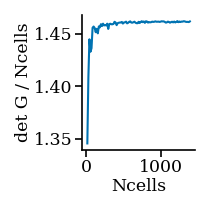

In [48]:
fig, ax = plt.subplots(figsize=(1.5,1.5))
plt.plot(ncells, the_jacobians.mean(axis=1)/ncells)
plt.xlabel('Ncells', fontsize='small')
#plt.ylabel('Mean |J| / Ncells')
#plt.ylabel(r'\hat{det G} / N')
plt.ylabel(r'det G / Ncells',fontsize='small')

fig.tight_layout()
fig.savefig('../results/mean_jacobian.pdf')

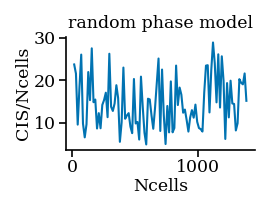

In [57]:
fig, ax = plt.subplots(figsize=(1.9,1.5))
ax.plot(ncells, cis/ncells)
ax.set_title('random phase model', fontsize='small')
ax.set_xlabel('Ncells', fontsize='small')
ax.set_ylabel('CIS/Ncells', fontsize='small')

fig.tight_layout()
fig.savefig('../results/CI_metric_vs_ncells.pdf')

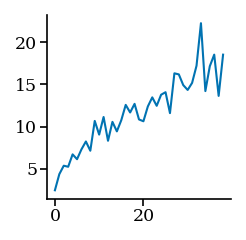

In [7]:
plt.plot(the_jacobians.std(axis=1))

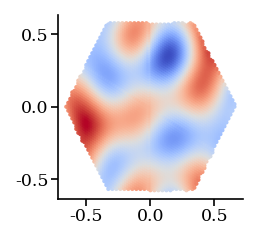

In [8]:
plt.scatter(*mesh.T, c=the_jacobian, cmap='coolwarm', s=1)